## 1

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [6]:
df_or = df.sort_values(by='total_litres_of_pure_alcohol', 
                        ascending=False)
testa = df_or.head(10)
testa.country

15                Belarus
98              Lithuania
3                 Andorra
68                Grenada
45         Czech Republic
61                 France
141    Russian Federation
81                Ireland
155              Slovakia
99             Luxembourg
Name: country, dtype: object

In [7]:
m_birra = df_or['beer_servings'].mean()
m_vino = df_or['wine_servings'].mean()
m_dist = df_or['spirit_servings'].mean()

print('Media del consumo di\nBirra:', m_birra,'\nVino:',
      m_vino, '\nDistillati:', m_dist)

Media del consumo di
Birra: 106.16062176165804 
Vino: 49.45077720207254 
Distillati: 80.99481865284974


In [8]:
df_or['alcohol_index'] = (df_or['beer_servings']+df_or['wine_servings']+
                          df_or['spirit_servings'])/3

df_or.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
15,Belarus,142,373,42,14.4,185.666667
98,Lithuania,343,244,56,12.9,214.333333
3,Andorra,245,138,312,12.4,231.666667
68,Grenada,199,438,28,11.9,221.666667
45,Czech Republic,361,170,134,11.8,221.666667


In [10]:
df_or[df_or['alcohol_index']==df_or['alcohol_index'].max()]['country']

3    Andorra
Name: country, dtype: object

In [11]:
df_or[df_or['beer_servings']>100]['country']

15            Belarus
98          Lithuania
3             Andorra
68            Grenada
45     Czech Republic
            ...      
29         Cabo Verde
170         Macedonia
20            Bolivia
146             Samoa
189           Vietnam
Name: country, Length: 79, dtype: object

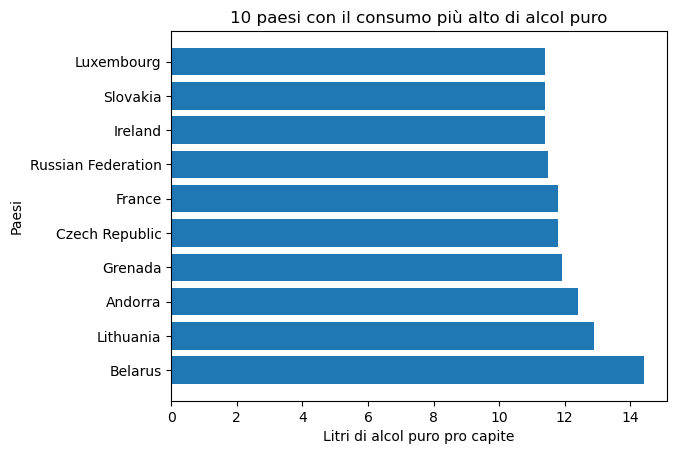

In [13]:
testa = df_or.head(10)

categorie = testa['country']
valori = testa['total_litres_of_pure_alcohol']
plt.barh(categorie, valori)
plt.xlabel('Litri di alcol puro pro capite')
plt.ylabel('Paesi')
plt.title('10 paesi con il consumo più alto di alcol puro')
plt.show()

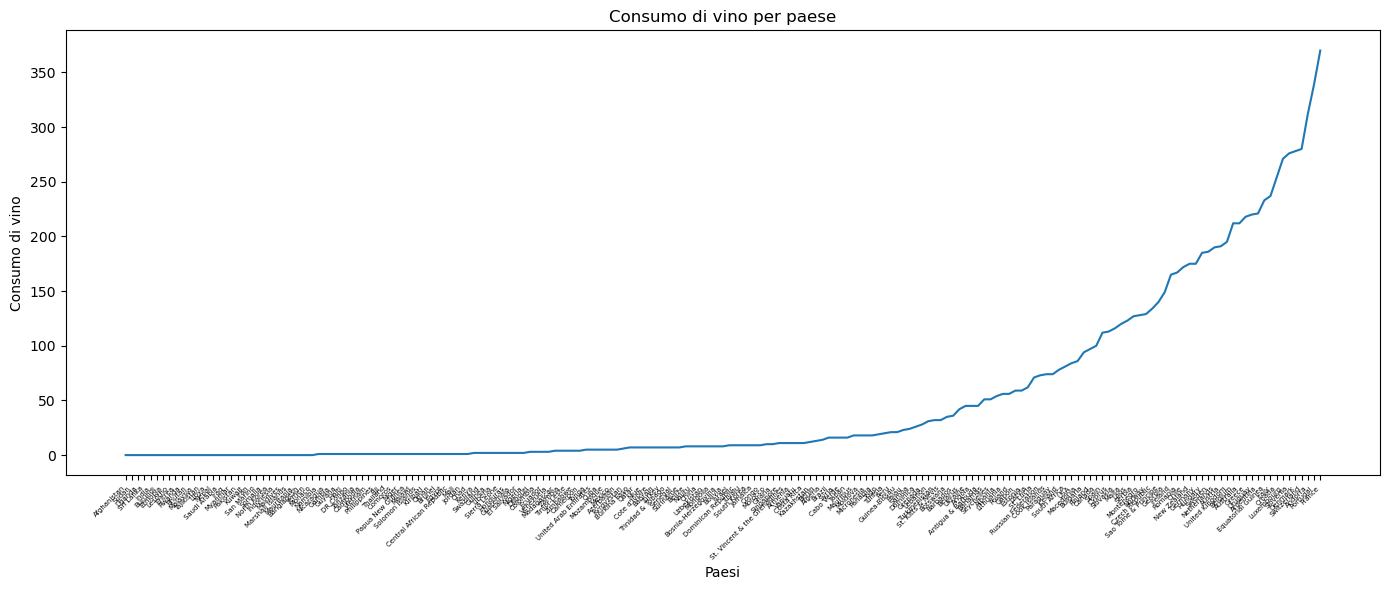

In [17]:
df_wine = df_or.sort_values(by='wine_servings', ascending=True)

plt.figure(figsize=(14,6))
plt.plot(df_wine['country'], df_wine['wine_servings'])

plt.ylabel("Consumo di vino")
plt.xlabel("Paesi")
plt.title("Consumo di vino per paese")
plt.xticks(rotation=45, ha='right', fontsize=5)
plt.tight_layout()
plt.show()

## 2

In [18]:
import pandas as pd
from datasets import load_dataset

In [20]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [27]:
df.dropna(subset=['salary_year_avg'], inplace=True)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."


In [29]:
df.groupby('job_country')['salary_year_avg'].mean()

job_country
Albania        79472.500000
Algeria        44550.000000
Argentina     105212.343750
Armenia        78757.000000
Australia     118987.574324
                  ...      
Uruguay        69333.333333
Uzbekistan     30750.000000
Vietnam        90927.236364
Zambia         90670.000000
Zimbabwe       67056.666667
Name: salary_year_avg, Length: 108, dtype: float64

In [30]:
df.groupby('job_country')['job_title_short'].count()

job_country
Albania        5
Algeria        2
Argentina     32
Armenia        6
Australia     74
              ..
Uruguay        3
Uzbekistan     1
Vietnam       55
Zambia         1
Zimbabwe       3
Name: job_title_short, Length: 108, dtype: int64

In [31]:
df.groupby('job_country')['salary_year_avg'].agg(['min', 'max'])

,min,max
job_country,,
Albania,43200.0,157500.0
Algeria,44100.0,45000.0
Argentina,45000.0,222000.0
Armenia,45000.0,128682.0
Australia,20000.0,257500.0
...,...,...
Uruguay,50000.0,100500.0
Uzbekistan,30750.0,30750.0
Vietnam,28000.0,200000.0


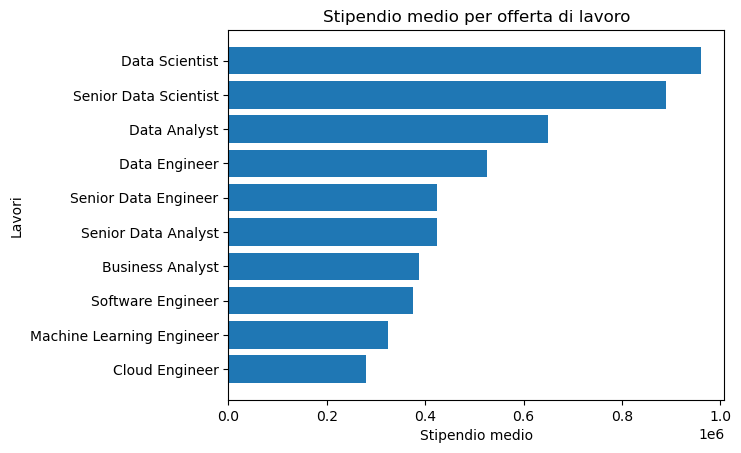

In [34]:
df_s = df.sort_values(by='salary_year_avg', 
             ascending=False)

categorie = df_s['job_title_short']
valori = df_s['salary_year_avg']

plt.barh(categorie, valori)
plt.xlabel("Stipendio medio")
plt.ylabel("Lavori")
plt.title("Stipendio medio per offerta di lavoro")
plt.gca().invert_yaxis()
plt.show()